In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
import random 
import pylab
import seaborn as sns
#import dask
%matplotlib inline
from tqdm import tqdm

In [2]:
#plt.style.use('whiregrid')
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams['font.family'] = "serif"
plt.rcParams["errorbar.capsize"] = 20



params = {'legend.fontsize': 'xx-large',
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}

plt.rcParams['mathtext.fontset'] = 'dejavuserif'

plt.rcParams.update(params)
plt.rc('font',**{'family':'serif','sans-serif':['Times']})
sns.set_style("ticks")
plt.rcParams['font.family'] = "serif"

In [4]:
from astropy.table import Table
data = Table.read('kepler_dr2_1arcsec.fits', format='fits') 

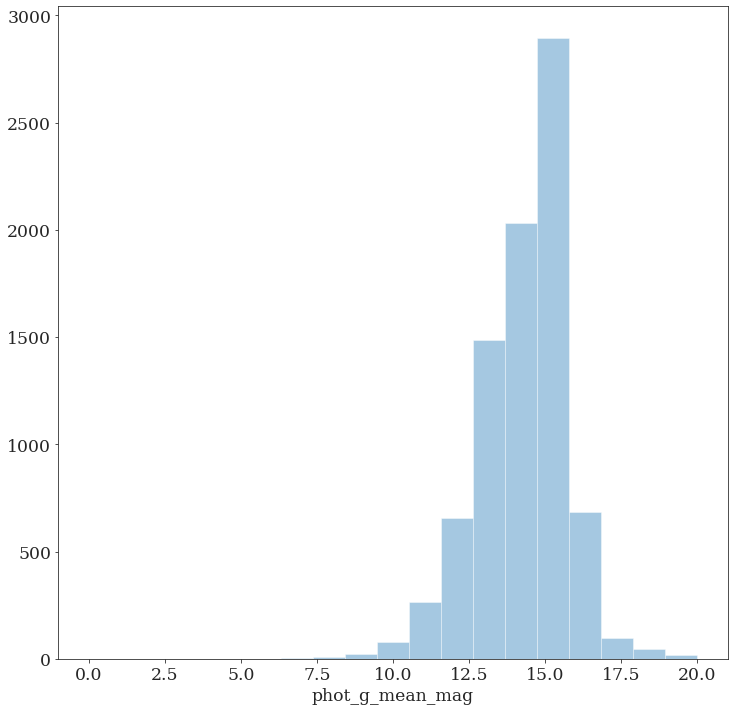

In [13]:
sns.distplot(data['phot_g_mean_mag'][data['nkoi']>0], bins= np.linspace(0,20, 20), kde=False)
plt.savefig('koi_gmag.png', dpi=800)

In [3]:
#data[data['nkoi']>0]

In [30]:
props_A, props_B

({'feh': -0.012519050601435218,
  'density': 1.3994609102302025,
  'eep': 348.9796257019043,
  'radius': 1.0024073595957388,
  'Teff': 5834.782979719397,
  'phase': 0.0,
  'Mbol': 4.687917861788,
  'logTeff': 3.7660247063306596,
  'delta_nu': 141.38238967974794,
  'nu_max': 3069.483441621318,
  'mass': 0.9998647639419379,
  'logL': 0.020832855284800236,
  'logg': 4.435999146983706,
  'initial_mass': 1.0,
  'interpolated': 0.0,
  'star_age': 3981105831.4568934,
  'age': 9.599999663674296,
  'dt_deep': 0.013280718567296703,
  'J_mag': 12.179587871614814,
  'H_mag': 11.835728922815576,
  'K_mag': 11.787350220704182,
  'BP_mag': 13.620832649193208,
  'RP_mag': 12.758310445284703,
  'G_mag': 13.27380470559853,
  'distance': 500.0,
  'AV': 0.2,
  'initial_feh': 0.0,
  'requested_age': 9.6},
 {'feh': 0.01529119361172381,
  'density': 3.0294797318184994,
  'eep': 319.87524032592773,
  'radius': 0.7040583834374863,
  'Teff': 4738.230707214007,
  'phase': 0.0,
  'Mbol': 6.359180503613306,
  'log

In [28]:
from isochrones import get_ichrone

mist = get_ichrone('mist')
%matplotlib inline

/home/quadry/anaconda3/envs/isochrones/lib/python3.8/site-packages/isochrones/priors.py:317: RuntimeWarning: divide by zero encountered in log
  return np.log(C) + self.alpha * np.log(x)


-inf
36.5 µs ± 481 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
CPU times: user 740 ms, sys: 132 ms, total: 872 ms
Wall time: 889 ms


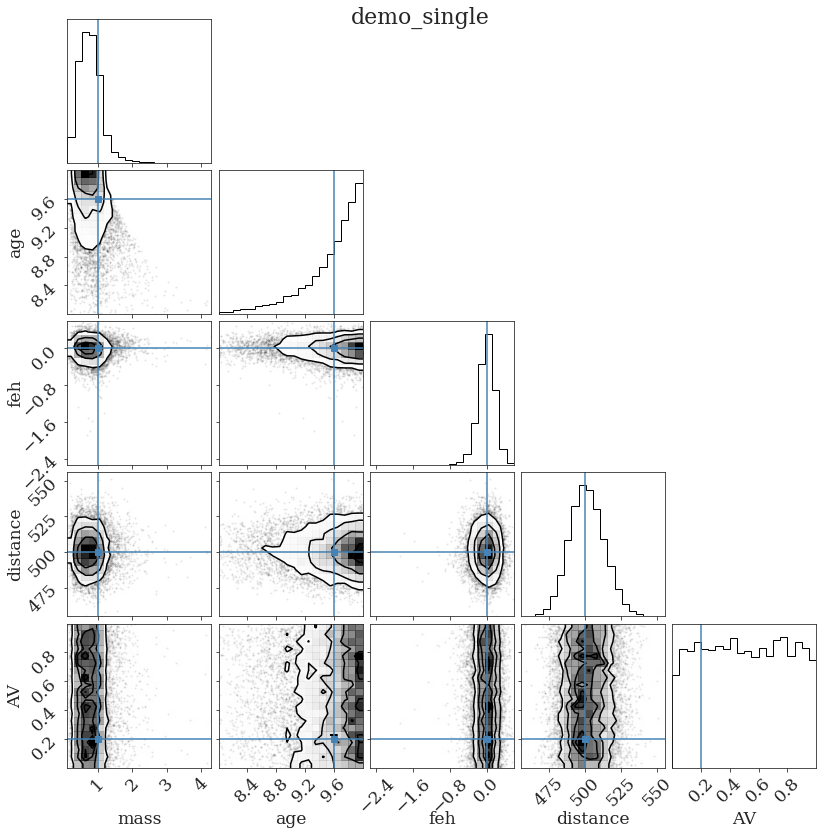

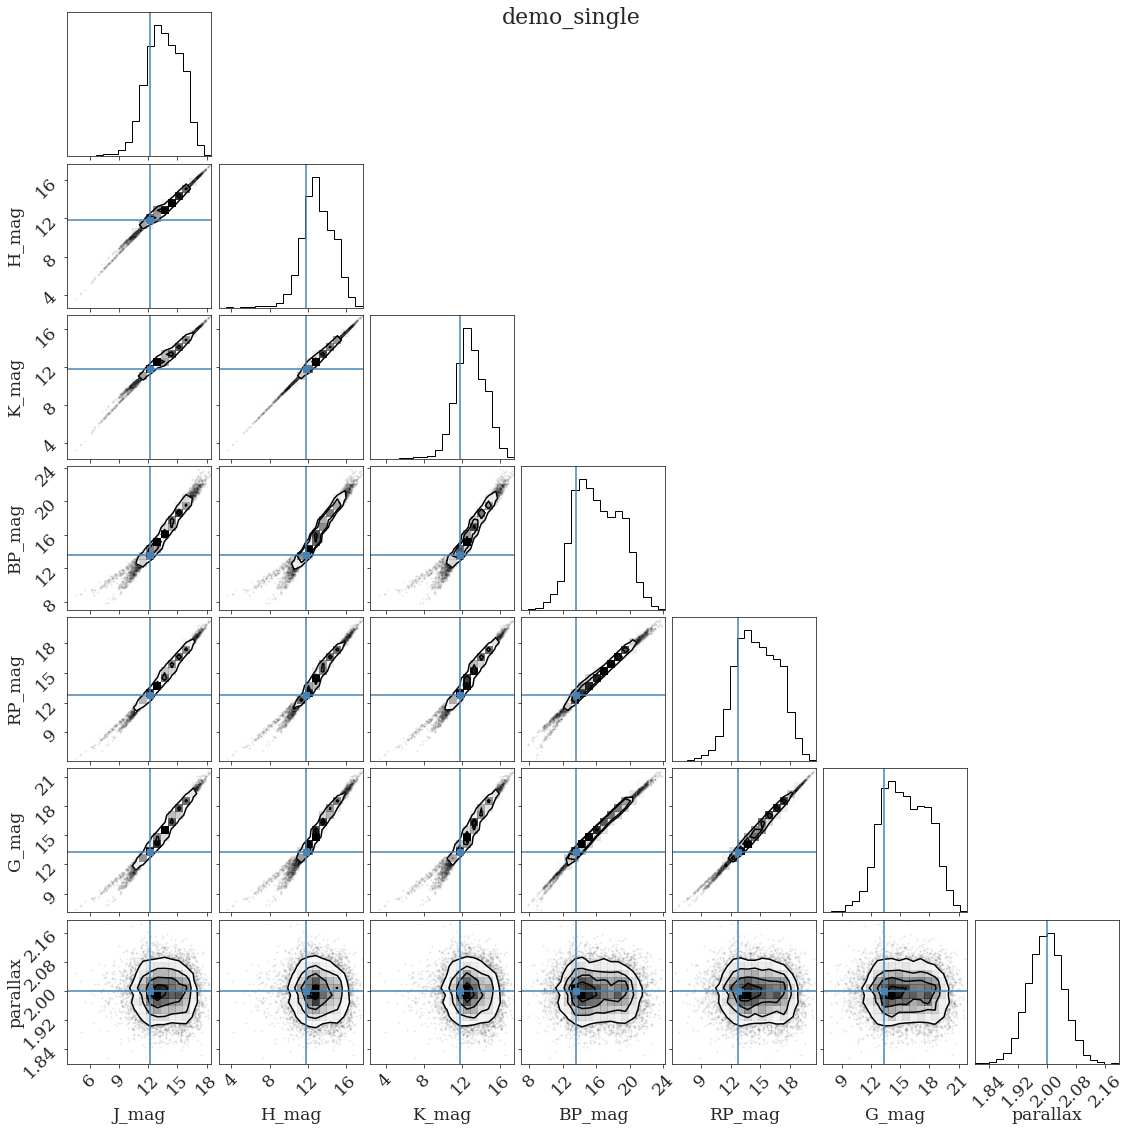

In [29]:
from isochrones import SingleStarModel
from isochrones.utils import addmags
for i in range (0,1):
    distance = 500  # pc
    AV = 0.2
    mass_A = 1.0
    mass_B = [1][i]
    age = 9.6
    feh = 0.0

    # Synthetic 2MASS and Gaia magnitudes
    bands_mag = ['J_mag', 'H_mag', 'K_mag', 'BP_mag', 'RP_mag', 'G_mag']
    bands = ['J', 'H', 'K', 'BP', 'RP', 'G']

    props_A = mist.track.generate(mass_A, age, feh, distance=distance, AV=AV,
                                  bands=bands, return_dict=True, accurate=True)
    props_B = mist.track.generate(mass_B, age, feh, distance=distance, AV=AV,
                                  bands=bands, return_dict=True, accurate=True)

    unc = dict(J_mag=0.02, H_mag=0.02, K_mag=0.02, BP_mag=0.002, RP_mag=0.002, G_mag=0.001)
    mags_tot = {b.split('_')[0]: ((props_A[b]), unc[b]) for b in bands_mag}

    # Gaia parallax in mas for a system at 500 pc
    parallax = (2, 0.05)

    mod_single = SingleStarModel(mist, **mags_tot, parallax=parallax, name='demo_single')

    #mod_single.param_names
    mod_single.set_bounds(eep=(1, 600), age=(8, 10))


    pars = [350., 300., 9.7, 0.0, 300., 0.1]
    print(mod_single.lnpost(pars))
    %timeit mod_single.lnpost(pars)



    ""
    %time mod_single.fit(n_live_points=2000) 

    

    columns = ['mass','age', 'feh', 'distance', 'AV']
    truths = [mass_A, age, feh, distance, AV]
    mod_single.corner_derived(columns, truths=truths);
    mod_single.corner_observed()

In [18]:
from isochrones import get_ichrone, SingleStarModel

mist = get_ichrone('mist', bands=['BP', 'RP'])
params = {'Teff': (5700, 100), 'logg': (4.5, 0.1), 'feh': (0.0, 0.15),
          'BP': (10.42, 0.01), 'RP': (9.54, 0.01),
          'parallax': (10, 0.5)}  # mas
mod = SingleStarModel(mist, **params)
mod.fit()

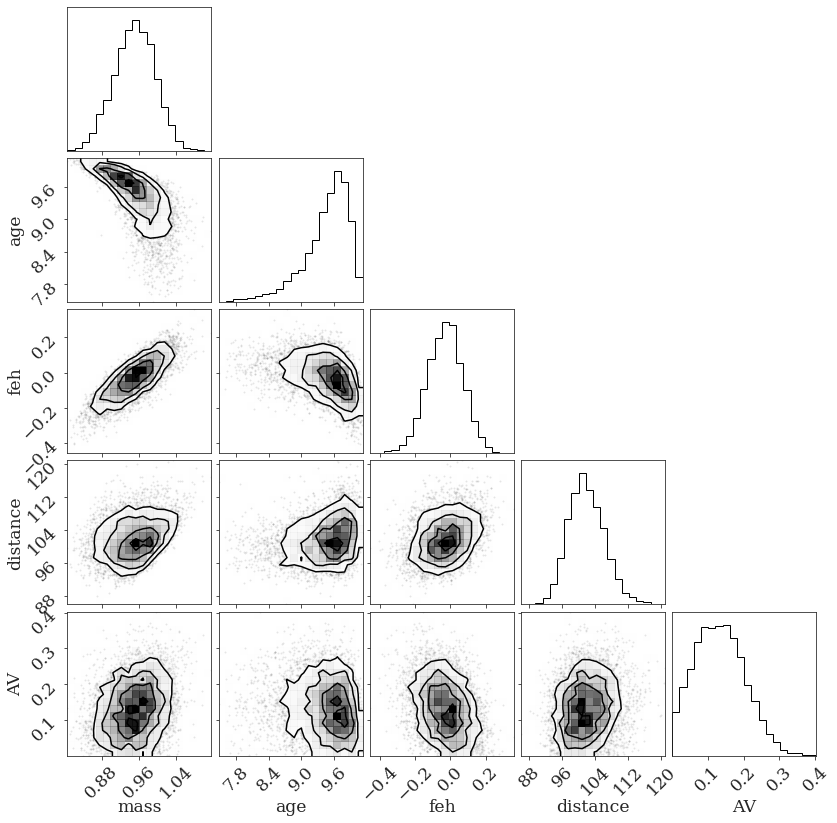

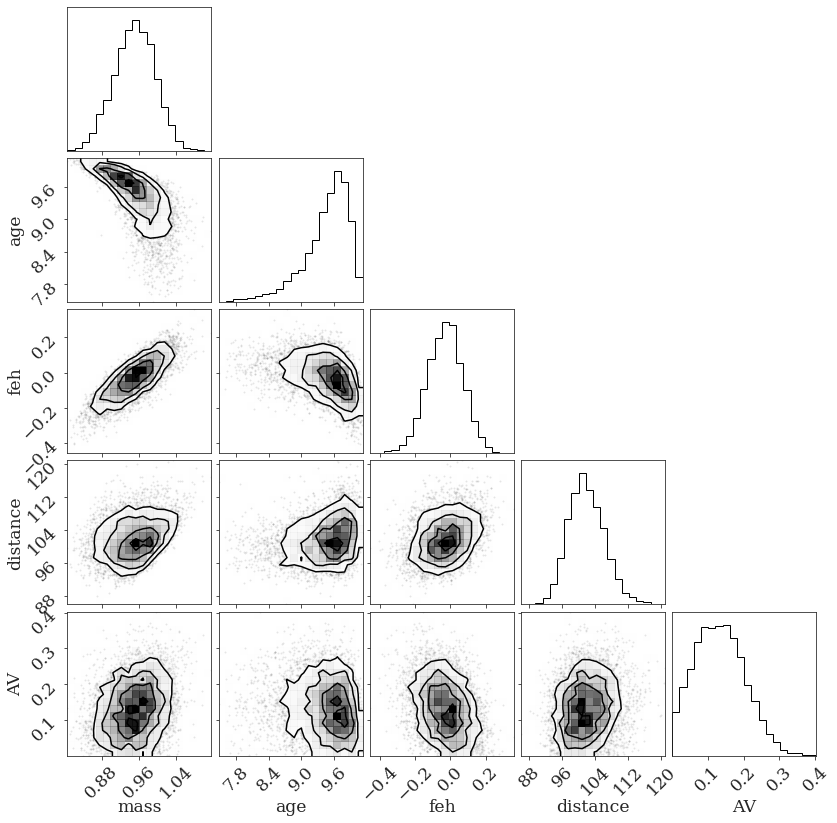

In [24]:
mod.corner_derived(columns)

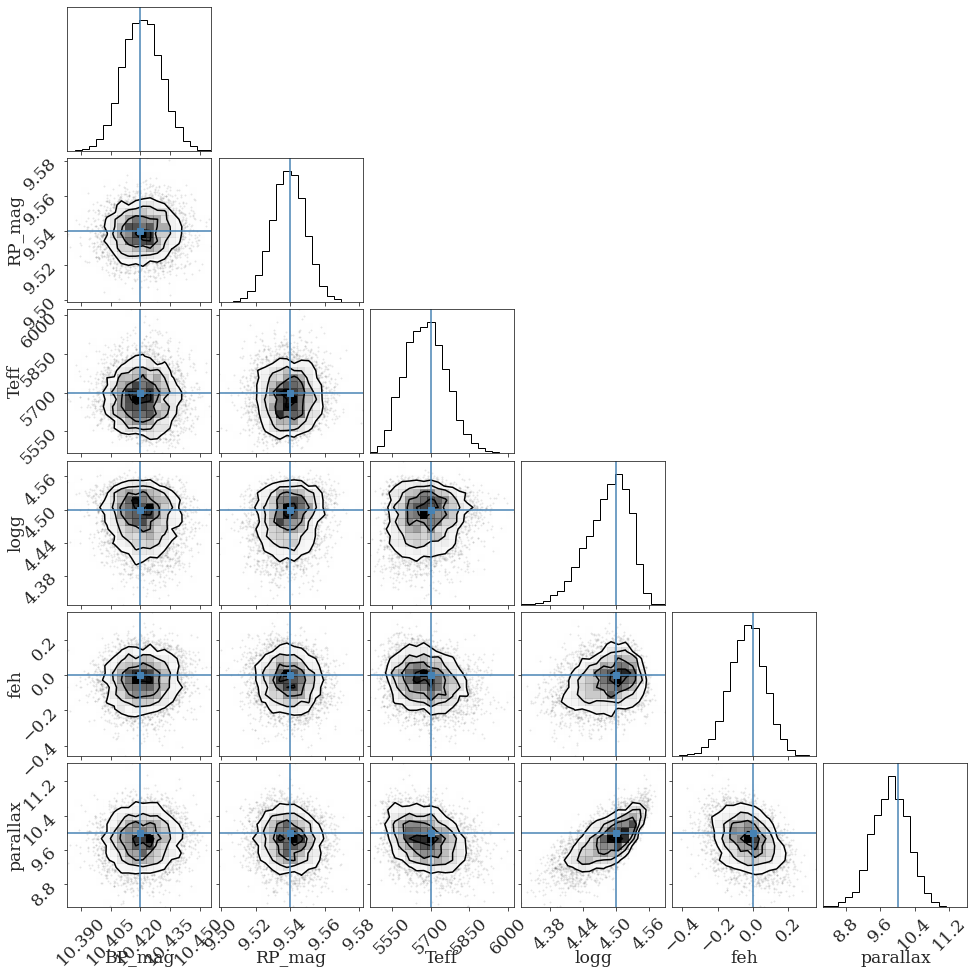

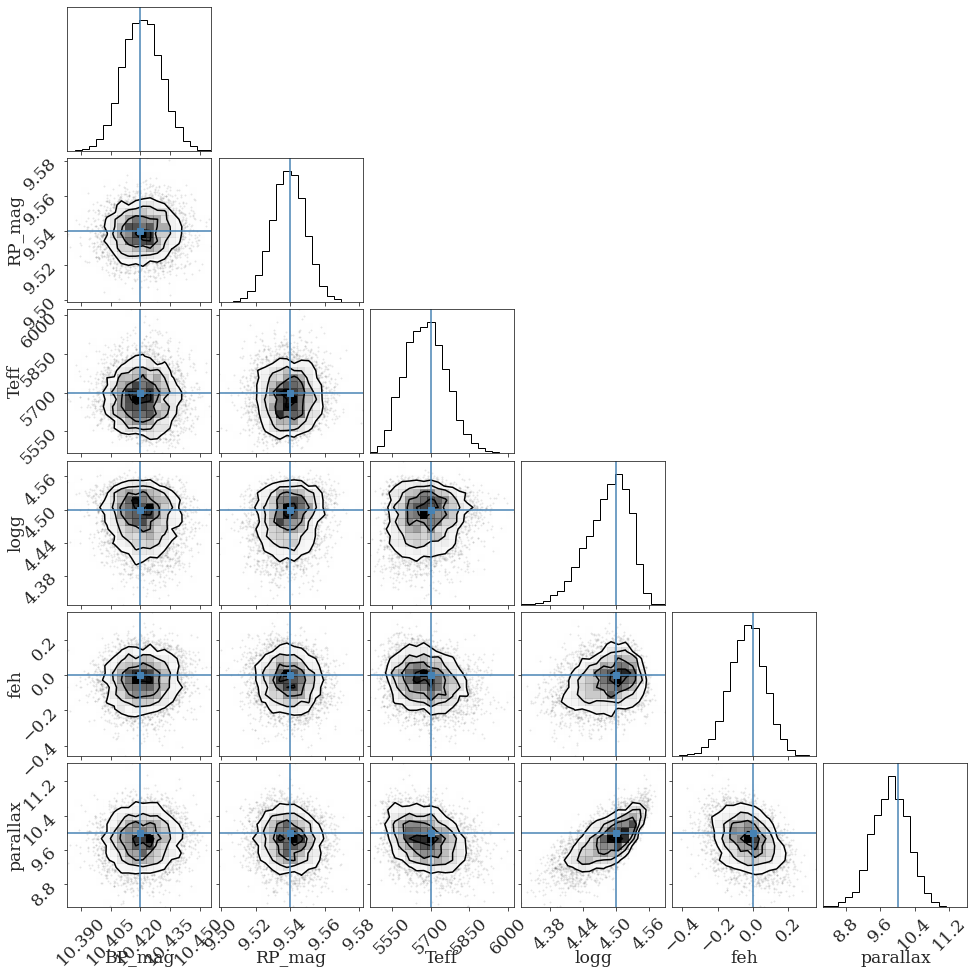

In [26]:
mod.corner_observed()

In [23]:
columns = ['mass', 'age', 'feh', 'distance', 'AV']


-29682.335067322103


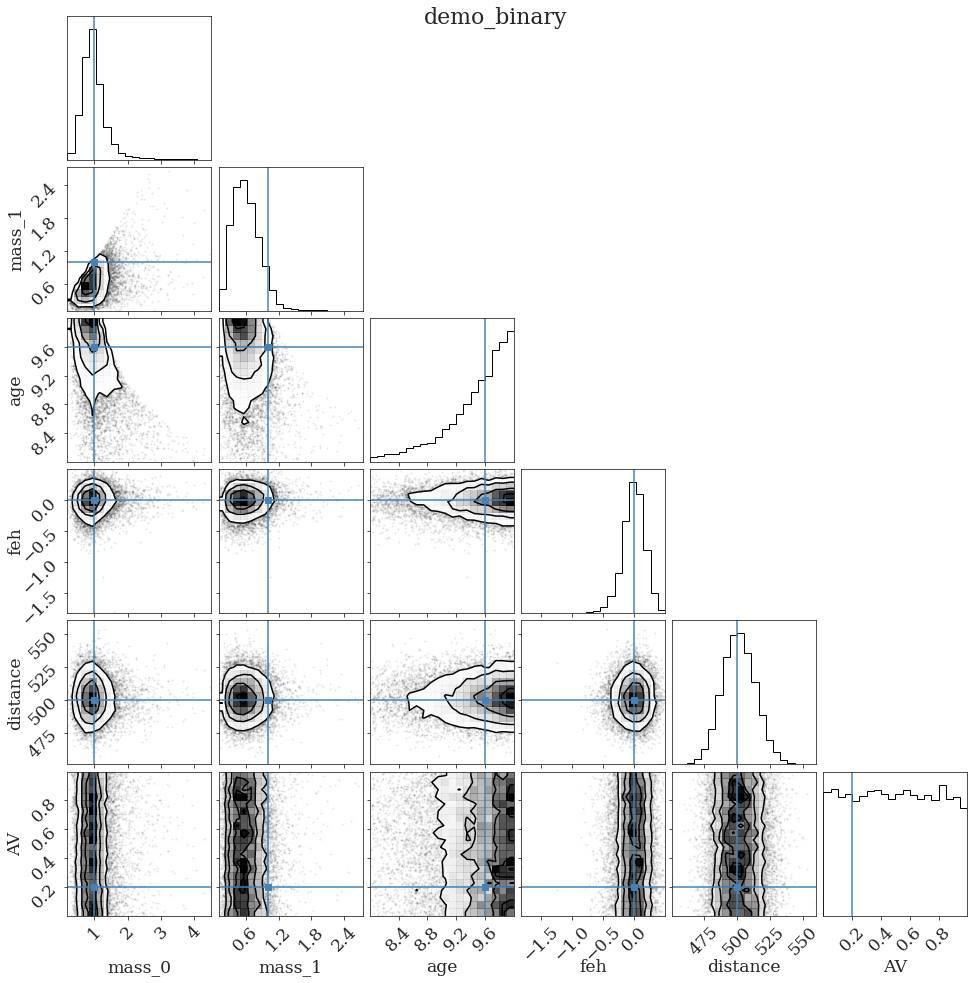

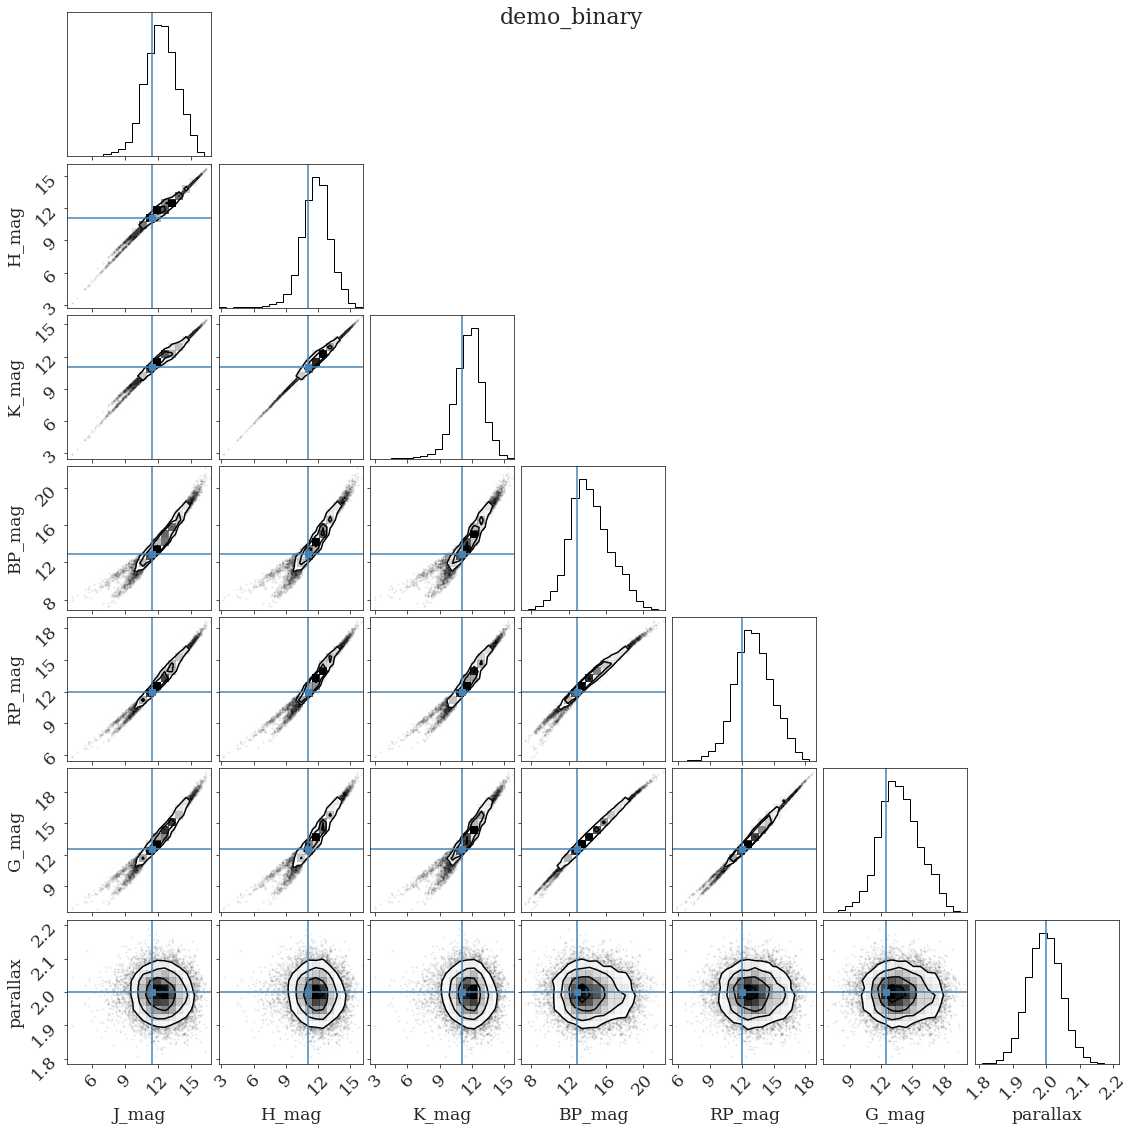

In [14]:
from isochrones import BinaryStarModel
from isochrones.utils import addmags
for i in range (0,1):
    distance = 500  # pc
    AV = 0.2
    mass_A = 1
    mass_B = [1][i]
    age = 9.6
    feh = 0.0

    # Synthetic 2MASS and Gaia magnitudes
    bands_mag = ['J_mag', 'H_mag', 'K_mag', 'BP_mag', 'RP_mag', 'G_mag']
    bands = ['J', 'H', 'K', 'BP', 'RP', 'G']

    props_A = mist.track.generate(mass_A, age, feh, distance=distance, AV=AV,
                                  bands=bands, return_dict=True, accurate=True)
    props_B = mist.track.generate(mass_B, age, feh, distance=distance, AV=AV,
                                  bands=bands, return_dict=True, accurate=True)

    unc = dict(J_mag=0.02, H_mag=0.02, K_mag=0.02, BP_mag=0.002, RP_mag=0.002, G_mag=0.001)
    mags_tot = {b.split('_')[0]: (addmags(props_A[b], props_B[b]), unc[b]) for b in bands_mag}

    # Gaia parallax in mas for a system at 500 pc
    parallax = (2, 0.05)

    mod_binary = BinaryStarModel(mist, **mags_tot, parallax=parallax, name='demo_binary')

    #mod_binary.param_names
    mod_binary.set_bounds(eep=(1, 600), age=(8, 10))


    pars = [350., 300., 9.7, 0.0, 300., 0.1]
    print(mod_binary.lnpost(pars))
    #%timeit mod_binary.lnpost(pars)



    ""
    mod_binary.fit(n_live_points=2000) 

    

    columns = ['mass_0', 'mass_1', 'age', 'feh', 'distance', 'AV']
    truths = [mass_A, mass_B, age, feh, distance, AV]
    mod_binary.corner_derived(columns, truths=truths);
    mod_binary.corner_observed()

In [16]:
mod_binary.kwargs


{'J': (11.42701288245486, 0.02),
 'H': (11.083153933655623, 0.02),
 'K': (11.034775231544229, 0.02),
 'BP': (12.868257660033255, 0.002),
 'RP': (12.00573545612475, 0.002),
 'G': (12.521229716438578, 0.001),
 'parallax': (2.0, 0.05)}

In [7]:
mags_tot

{'J_mag': (11.42701288245486, 0.02),
 'H_mag': (11.083153933655623, 0.02),
 'K_mag': (11.034775231544229, 0.02),
 'BP_mag': (12.868257660033255, 0.002),
 'RP_mag': (12.00573545612475, 0.002),
 'G_mag': (12.521229716438578, 0.001)}

/home/quadry/anaconda3/envs/isochrones/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lnprob', ylabel='Density'>

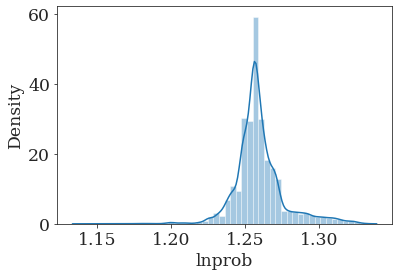

In [13]:


sns.distplot(mod_binary.samples['lnprob']/mod_single.samples['lnprob'])

In [38]:
from isochrones.priors import GaussianPrior

mod_binary_2 = BinaryStarModel(mist, **mags_tot, parallax=parallax, name='demo_binary_2')
mod_binary_2.set_bounds(eep=(1, 600))
mod_binary_2.set_prior(AV=GaussianPrior(2, 1, bounds=(1,3)))
mod_binary_2.lnpost(pars)


-inf

In [39]:
mod_binary_2.fit(n_live_points=2000)

In [41]:
mod_binary_2.samples['lnprob']

0       -41.598469
1       -39.254036
2       -38.879301
3       -38.680469
4       -38.530466
           ...    
12364   -27.777697
12365   -27.761211
12366   -27.406432
12367   -27.694541
12368   -27.501451
Name: lnprob, Length: 12369, dtype: float64